In [1]:
import sys
sys.path.append('..')
from IA import *
import os

### Import Data
Import GFP and AF images, apply 1-pixel Gaussian filter

In [2]:
img_gfp = gaussian_filter(load_image('Data/_0_w2488 SP 535-50 Nelio.TIF'), sigma=1)
img_af = gaussian_filter(load_image('Data/_0_w3488 SP 630-75 Nelio-AF.TIF'), sigma=1)

### Autofluorescence correction
Use calibration (determined from N2s) to create single AF corrected image

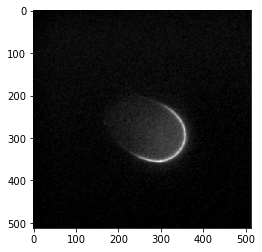

In [3]:
img = af_subtraction(img_gfp, img_af, m=2.09859954391, c=-83.7077471057)
plt.imshow(img, cmap='gray', vmin=0)
plt.show()

### Define manual ROI

<IPython.core.display.Javascript object>


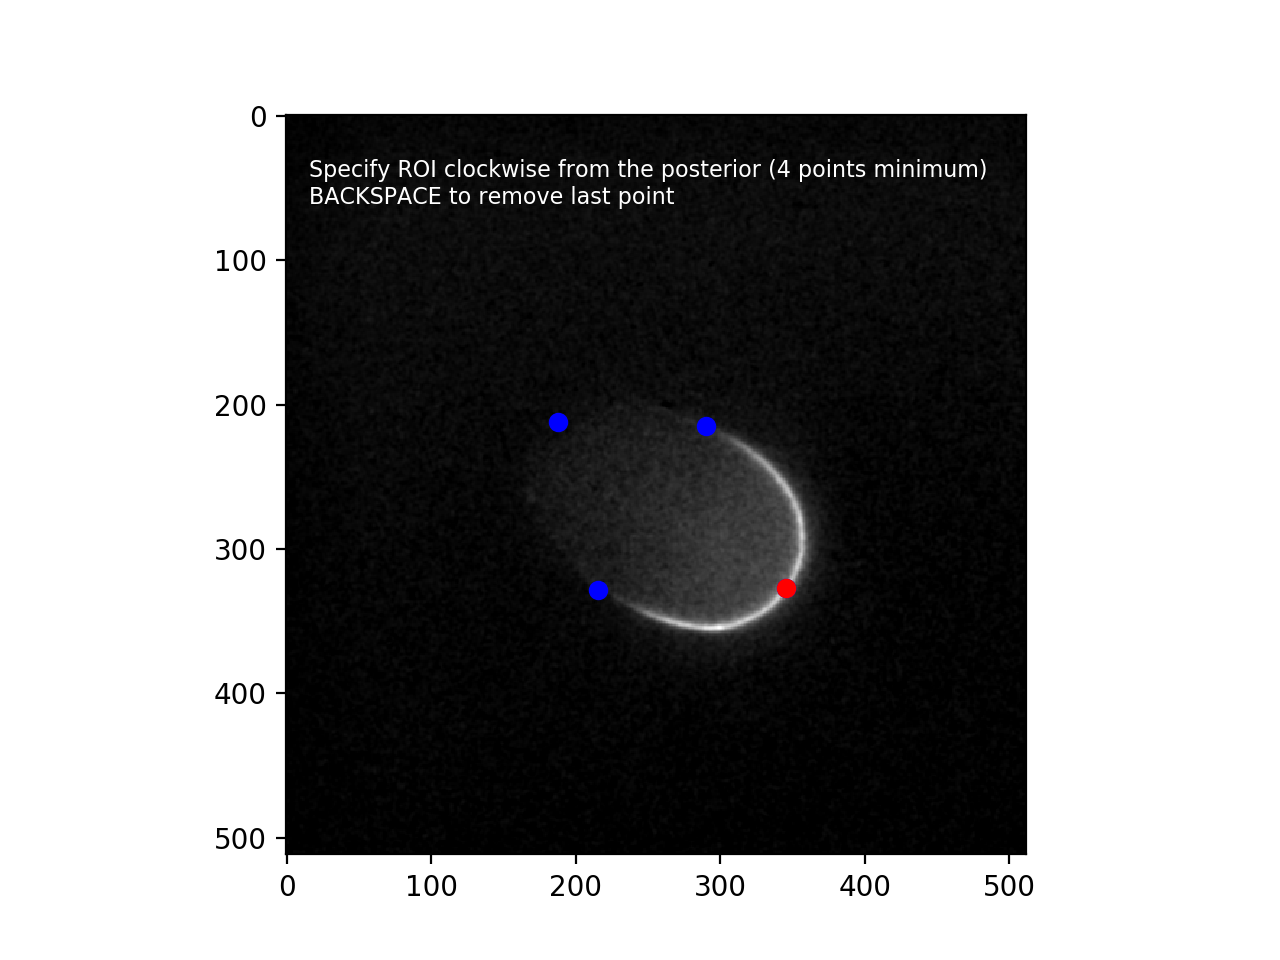

In [4]:
%matplotlib notebook
plt.imshow(img, cmap='gray', vmin=0)
roi = ROI()

In [5]:
%matplotlib inline
coors = fit_spline(np.vstack((roi.xpoints, roi.ypoints)).T)

### Set up quantifier
Quantification requires cytoplasmic and cortical background curves

In [27]:
cytbg = np.loadtxt('Data/cytbg.txt')
membg = np.loadtxt('Data/membg.txt')

q = MembraneQuant(img=img, coors=coors, cytbg=cytbg, membg=membg,
                  thickness=50, cytbg_offset=2, resolution=1, freedom=0.5,
                  periodic=True, itp=10, rol_ave=20, savgol_window=19, savgol_order=1,
                  resolution_cyt=20, parallel=True, method='1')

### Preliminary quantification
If ROI is rough, can do a preliminary fit. Offsets then used to refine ROI for final quantification

In [26]:
q.fit()
q.adjust_coors()

KeyboardInterrupt: 

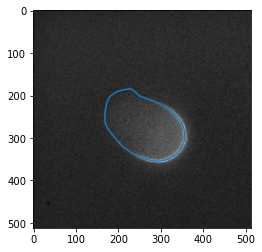

In [20]:
plt.imshow(img, cmap='gray')
plt.plot(q.coors[:, 0], q.coors[:, 1]);

### Final quantification

In [28]:
q.fit()

### Simulated images

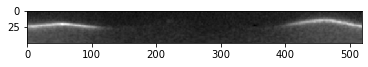

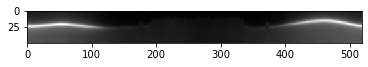

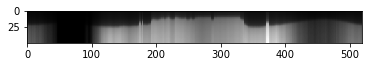

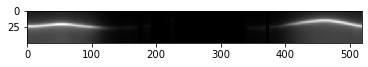

In [29]:
plt.imshow(q.straight, cmap='gray')
plt.show()

plt.imshow(q.straight_fit, cmap='gray')
plt.show()

plt.imshow(q.straight_cyt, cmap='gray')
plt.show()

plt.imshow(q.straight_mem, cmap='gray')
plt.show()

### Cortical and cytoplasmic concentration plots

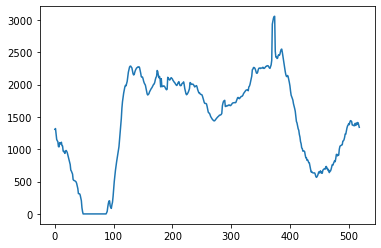

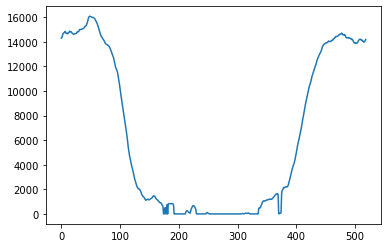

In [30]:
plt.plot(q.cyts)
plt.show()

plt.plot(q.mems)
plt.show()